# Milestone 1
---

## Introduction

Name  : Izzatur Arrasya 002<br>

## Dataset Introduction
<b>Telco Customer Churn</b> <br>

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs."

Teach row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

1. Customers who left within the last month – the column is called Churn
2. Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
3. Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
4. Demographic info about customers – gender, age range, and if they have partners and dependents

## Objective

In this notebook of Milestone 1 was created to evaluate concept as follows:

1. Able to understand the concept of Artificial Neural Networks (ANN)
2. Able to prepare data for use in Artificial Neural Networks (ANN)
3. Able to implement Artificial Neural Networks (ANN)
4. Able to evaluated the models
5. Able to tuning the models

## Import library
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

from sklearn.model_selection import train_test_split
from tqdm import tqdm

## Data Loading
---

In [2]:
#load data using pandas
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.shape

(7043, 21)

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

From the data above, we get some of information of every column in data frame :

1. Column 'customerID' : Customer ID
2. Column 'gender' : Whether the customer is a male or a female
3. Column 'SeniorCitizen' : Whether the customer is a senior citizen or not (1, 0)
4. Column 'Partner' : Whether the customer has a partner or not (Yes ,No)
5. Column 'Dependents' : Whether the customer has dependents or not (Yes, No)
6. Column 'tenure' : Number of months the customer has stayed with the company
7. Column 'PhoneService' : Whether the customer has a phone service or not (Yes, No)
8. Column 'MultipleLines' : Whether the customer has multiple lines or not (Yes, No, No phone service)
9. Column 'InternetService' : Customer’s internet service provider (DSL, Fiber optic, No)
10. Column 'OnlineSecurity' : Whether the customer has online security or not (Yes, No, No internet service)
11. Column 'OnlineBackup' : Whether the customer has online backup or not (Yes, No, No internet service)
12. Column 'DeviceProtection' : Whether the customer has device protection or not (Yes, No, No internet service)
13. Column 'TechSupport' : Whether the customer has tech support or not (Yes, No, No internet service)
14. Column 'StreamingTV' : Whether the customer has streaming TV or not (Yes, No, No internet service)
15. Column 'StreamingMovies' : Whether the customer has streaming movies or not (Yes, No, No internet service)
16. Column 'Contract' : The contract term of the customer (Month-to-month, One year, Two year)
17. Column 'PaperlessBilling' : Whether the customer has paperless billing or not (Yes, No)
18. Column 'PaymentMethod' : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
19. Column 'MonthlyCharges' : 	The amount charged to the customer monthly
20. Column 'TotalCharges' : The total amount charged to the customer
21. Column 'Churn' : Customers who left within the last month

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


As you can see from above data that tenure and MonthlyCharges values differ by order of magnitude, we will have to address this problem and normalize the data before modeling. Also, it will be interesting to see the effect of MonthlyCharges and tenure on the customer churn. Now let's check for NA or missing values.

## Data Cleaning
---

In [7]:
#copy dataframe
df_tc = df.copy()

In [8]:
#check any missing value
df_tc.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
#checking any duplicate row
df_tc.duplicated().sum()

0

## Exploration Data  Analysis
---

In [10]:
#copy dataframe
df_eda = df.copy()

C:\Users\izzat\Anaconda3\envs\tf-gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '26.54 % (1869) of cust will churn & 73.46 % (5174) of cust will retain')

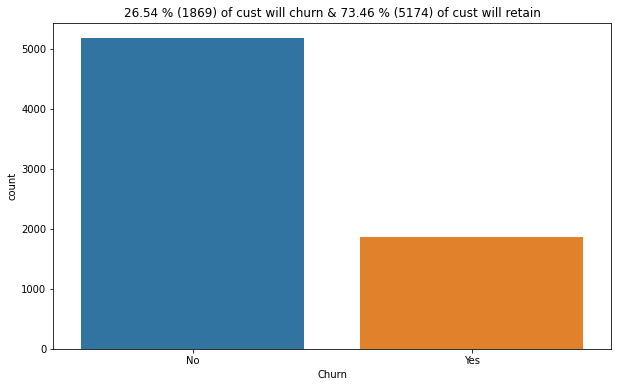

In [11]:
# Count of customer that will churn
cust_churn_yes_count = df_eda[df_eda.Churn == 'Yes'].shape[0]
# Count of customer that will not churn (retain)
cust_churn_no_count = df_eda[df_eda.Churn == 'No'].shape[0]

# Percentage of customer that will churn
cust_churn_yes_percent = round((cust_churn_yes_count / (cust_churn_yes_count + cust_churn_no_count) * 100),2)
# Percentage of customer that will not churn (retain)
cust_churn_no_percent = round((cust_churn_no_count / (cust_churn_yes_count + cust_churn_no_count) * 100 ),2)

plt.figure(figsize=(10,6))
ax = sns.countplot(df_eda['Churn'])
ax.set_title(f'{cust_churn_yes_percent} % ({cust_churn_yes_count}) of cust will churn & {cust_churn_no_percent} % ({cust_churn_no_count}) of cust will retain')

You can see above most of the customer says 'No' means customer will remain with the company, out of all the available data 73.46% customers are going to stay with the company.

Text(0.5, 1.0, 'Effect of Gender on Customer Churn')

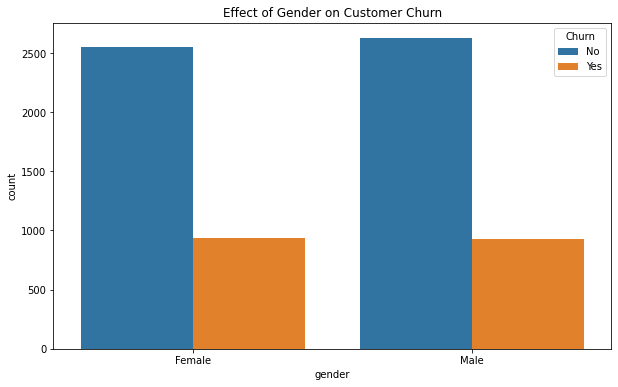

In [12]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x= 'gender', hue='Churn', data=df_eda)
ax.set_title(f'Effect of Gender on Customer Churn')

As you can see customer gender doesn't seem to affecting churn count.

Text(0.5, 0, 'SeniorCitizens(0: No, 1: Yes)')

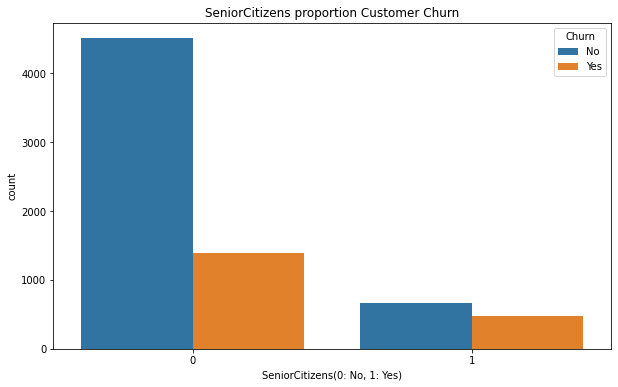

In [13]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x= 'SeniorCitizen', hue='Churn', data=df_eda)
ax.set_title(f'SeniorCitizens proportion Customer Churn')
plt.xlabel('SeniorCitizens(0: No, 1: Yes)')

As we can see from above graph that senior citizens though being few in number have higher customer churn percentage.

Text(0.5, 1.0, 'Effect of internet service on customer churn')

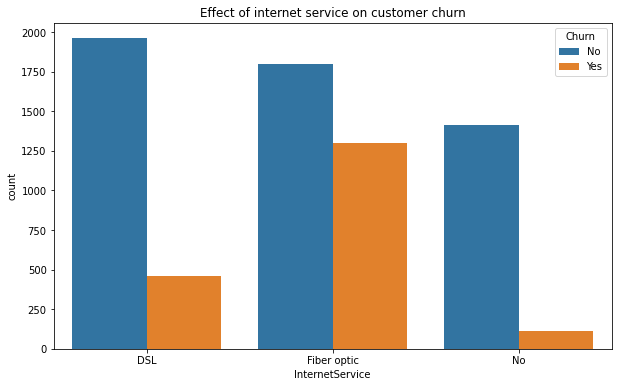

In [14]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x= 'InternetService', hue='Churn', data=df_eda)
ax.set_title(f'Effect of internet service on customer churn')

As we can see from above graph that customers who are using DSL internet service tends to be more loyal as compare to fiber optic using customers. There can be many reasons for this and an accurate conclusion can be drawn by analyzing DSL and fiber optic data in detail.  So over all the company should have a look at the internet service offerings and try to fix bring down the shortcomings.

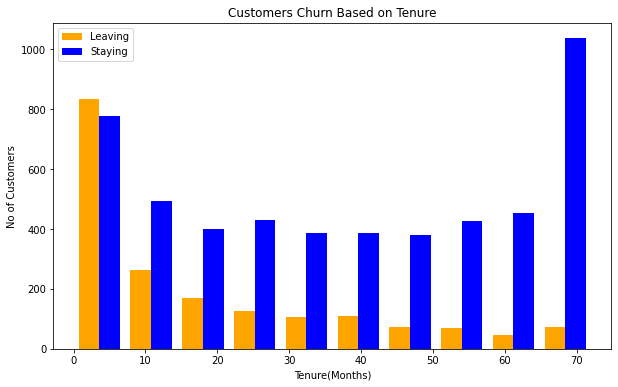

In [15]:
tenure_churn_yes = df_eda[df_eda.Churn == 'Yes'].tenure
tenure_churn_no = df_eda[df_eda.Churn == 'No'].tenure

plt.figure(figsize=(10,6))
plt.hist([tenure_churn_yes, tenure_churn_no], color=['orange', 'blue'], label= ['Leaving', 'Staying'])
plt.xlabel('Tenure(Months)')
plt.ylabel('No of Customers')
plt.title('Customers Churn Based on Tenure')
plt.legend()

From above histogram it's clear that more number of customers tend to stay with the company after the first 10 months of service. So the company can concentrate more on the new customer and their initial experience with the service to increase the customer retention.

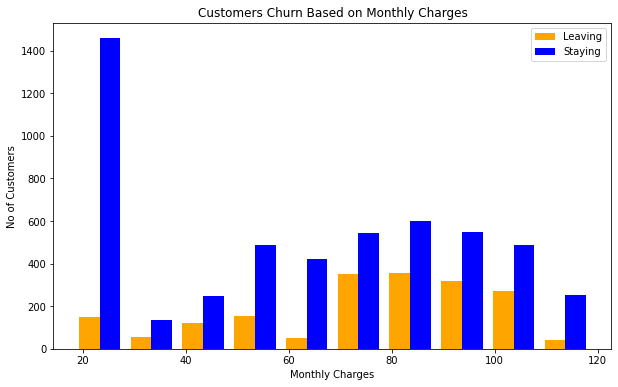

In [16]:
monthly_charges_churn_yes = df_eda[df_eda.Churn == 'Yes'].MonthlyCharges
monthly_charges_churn_no = df_eda[df_eda.Churn == 'No'].MonthlyCharges


plt.figure(figsize=(10,6))
plt.hist([monthly_charges_churn_yes, monthly_charges_churn_no], color=['orange', 'blue'], label= ['Leaving', 'Staying'])
plt.xlabel('Monthly Charges')
plt.ylabel('No of Customers')
plt.title('Customers Churn Based on Monthly Charges')
plt.legend()

From above histogram for lowest monthly rates between 20 and 40 highest is the customer retention. But customer attrition increases for monthly charges between 70 and 100. So the company can reduce the monthly charges or add more value to the service for the same price to increase the customer retention.

## Data Preprocessing
---

In [17]:
dfc1 = df.drop('customerID', axis = 'columns')
dfc1.shape 

(7043, 20)

In [18]:
dfc1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [19]:
#check why TotalCharges object type
dfc1.TotalCharges.unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [20]:
# Print rows with missing TotalCharges values
dfc1[dfc1.TotalCharges == ' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


Customers with TotalCharges 0 had tenure 0 months, that means they are new customers. TotalCharges will be available for them after first month of service. Now instead of deleting these training examples we can replace with 0 as TotalCharges.

In [21]:
dfc1.TotalCharges =  dfc1.TotalCharges.replace(r' ', '0')
dfc1[dfc1.tenure == 0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0,No


In [22]:
#change TotalCharge datatype
dfc1.TotalCharges = pd.to_numeric(dfc1.TotalCharges)
print(dfc1.TotalCharges.dtype)     

float64


In [23]:
def print_unique_col_values(df):
    
    print('Unique values from categorical columns,\n')
    for column in df.columns:
        if(df[column].dtypes == 'object'): 
            print(f'column: {column}, Unique vlaues: {df[column].unique()}')
        
print_unique_col_values(dfc1)

Unique values from categorical columns,

column: gender, Unique vlaues: ['Female' 'Male']
column: Partner, Unique vlaues: ['Yes' 'No']
column: Dependents, Unique vlaues: ['No' 'Yes']
column: PhoneService, Unique vlaues: ['No' 'Yes']
column: MultipleLines, Unique vlaues: ['No phone service' 'No' 'Yes']
column: InternetService, Unique vlaues: ['DSL' 'Fiber optic' 'No']
column: OnlineSecurity, Unique vlaues: ['No' 'Yes' 'No internet service']
column: OnlineBackup, Unique vlaues: ['Yes' 'No' 'No internet service']
column: DeviceProtection, Unique vlaues: ['No' 'Yes' 'No internet service']
column: TechSupport, Unique vlaues: ['No' 'Yes' 'No internet service']
column: StreamingTV, Unique vlaues: ['No' 'Yes' 'No internet service']
column: StreamingMovies, Unique vlaues: ['No' 'Yes' 'No internet service']
column: Contract, Unique vlaues: ['Month-to-month' 'One year' 'Two year']
column: PaperlessBilling, Unique vlaues: ['Yes' 'No']
column: PaymentMethod, Unique vlaues: ['Electronic check' 'Mail

In [24]:
#replace 'No phone service' with 'No' in column MultipleLines and ''No internet service' with 'no' in columns OnlineSecurity, DeviceProtection, TechSupport, StreamingTV, StreamingMovies. 
dfc1.replace('No internet service', 'No', inplace = True)
dfc1.replace('No phone service', 'No', inplace = True)

print_unique_col_values(dfc1)

Unique values from categorical columns,

column: gender, Unique vlaues: ['Female' 'Male']
column: Partner, Unique vlaues: ['Yes' 'No']
column: Dependents, Unique vlaues: ['No' 'Yes']
column: PhoneService, Unique vlaues: ['No' 'Yes']
column: MultipleLines, Unique vlaues: ['No' 'Yes']
column: InternetService, Unique vlaues: ['DSL' 'Fiber optic' 'No']
column: OnlineSecurity, Unique vlaues: ['No' 'Yes']
column: OnlineBackup, Unique vlaues: ['Yes' 'No']
column: DeviceProtection, Unique vlaues: ['No' 'Yes']
column: TechSupport, Unique vlaues: ['No' 'Yes']
column: StreamingTV, Unique vlaues: ['No' 'Yes']
column: StreamingMovies, Unique vlaues: ['No' 'Yes']
column: Contract, Unique vlaues: ['Month-to-month' 'One year' 'Two year']
column: PaperlessBilling, Unique vlaues: ['Yes' 'No']
column: PaymentMethod, Unique vlaues: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
column: Churn, Unique vlaues: ['No' 'Yes']


In [25]:
# Converting churn to numeric
dfc1['Churn'].replace({'Yes': 1,'No': 0},inplace=True)

In [26]:
# cleaned dataset after encoded
dfc2 = pd.get_dummies(data = dfc1)

dfc2.sample(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5779,0,39,95.55,3692.85,1,1,0,1,0,1,...,0,0,1,0,0,1,0,0,1,0
1318,0,8,66.70,579.00,0,0,1,1,0,1,...,1,1,0,0,0,1,0,0,1,0
4726,0,72,49.20,3580.95,0,1,0,0,1,1,...,1,0,0,1,0,1,0,0,1,0
346,0,2,90.40,168.20,1,1,0,1,0,1,...,1,1,0,0,0,1,0,0,1,0
5547,0,3,89.45,240.45,1,1,0,1,0,1,...,1,1,0,0,0,1,0,0,1,0


In [27]:
col_sc = ['tenure','MonthlyCharges','TotalCharges']

#using pipeline
pipe = Pipeline([('minmax_scaler', MinMaxScaler())])
dfc2[col_sc] = pipe.fit_transform(dfc2[col_sc])
dfc2[col_sc].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,0.449599,0.462803,0.262497
std,0.341104,0.299403,0.261007
min,0.000000,0.000000,0.000000
25%,0.125000,0.171642,0.045891
50%,0.402778,0.518408,0.160574
75%,0.763889,0.712438,0.436003
max,1.000000,1.000000,1.000000


In [28]:
# Train Test Split
X = dfc2.drop('Churn',axis = 'columns')

y = dfc2['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

## Modeling
---

In [29]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(38, input_shape= (38,), activation= 'relu'),
    tf.keras.layers.Dense(14, activation= 'relu'),
    tf.keras.layers.Dense(1, activation= 'sigmoid')     
])

model.compile(optimizer= 'adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

### Model Training

In [30]:
model.fit(X_train, y_train, epochs= 100)

Epoch 1/100
177/177 [==============================] - 2s 4ms/step - loss: 0.4898 - accuracy: 0.7632
Epoch 2/100
177/177 [==============================] - 1s 4ms/step - loss: 0.4305 - accuracy: 0.7922
Epoch 3/100
177/177 [==============================] - 1s 3ms/step - loss: 0.4254 - accuracy: 0.7957
Epoch 4/100
177/177 [==============================] - 1s 3ms/step - loss: 0.4230 - accuracy: 0.7989
Epoch 5/100
177/177 [==============================] - 1s 4ms/step - loss: 0.4201 - accuracy: 0.8019
Epoch 6/100
177/177 [==============================] - 1s 3ms/step - loss: 0.4183 - accuracy: 0.8023
Epoch 7/100
177/177 [==============================] - 1s 4ms/step - loss: 0.4156 - accuracy: 0.8033
Epoch 8/100
177/177 [==============================] - 1s 3ms/step - loss: 0.4146 - accuracy: 0.8049
Epoch 9/100
177/177 [==============================] - 0s 3ms/step - loss: 0.4156 - accuracy: 0.8019
Epoch 10/100
177/177 [==============================] - 1s 3ms/step - loss: 0.4113 - accura

## Model Evaluation & Inference
---

In [31]:
model.evaluate(X_test, y_test)

45/45 [==============================] - 0s 3ms/step - loss: 0.5006 - accuracy: 0.7715


[0.5006373524665833, 0.7714691162109375]

In [32]:
predictions = model.predict(X_test)
predictions[:5]

array([[7.3219162e-01],
       [1.4386751e-02],
       [2.4492643e-03],
       [6.5909433e-01],
       [3.5612597e-04]], dtype=float32)

In [33]:
y_pred = []

for val in predictions:
    if val > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
            
y_pred[:10]

[1, 0, 0, 1, 0, 0, 0, 0, 0, 0]

In [34]:
df_true_pred = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred}) 
df_true_pred[:10]

,y_test,y_pred
185,1,1
2715,0,0
3825,0,0
1807,1,1
132,0,0
1263,1,0
3732,0,0
1672,0,0
811,1,0
2526,1,0


In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1036
           1       0.58      0.51      0.54       373

    accuracy                           0.77      1409
   macro avg       0.70      0.69      0.70      1409
weighted avg       0.76      0.77      0.77      1409



From the report we can see that

1. Precision, Recall, and F1 score for 'class 0' is more than 80% and around 50% for 'class 1'
2. The accuracy of the model was about 79% which is better than the 73.46% customer from given data do not churn.

Text(69.0, 0.5, 'Truth')

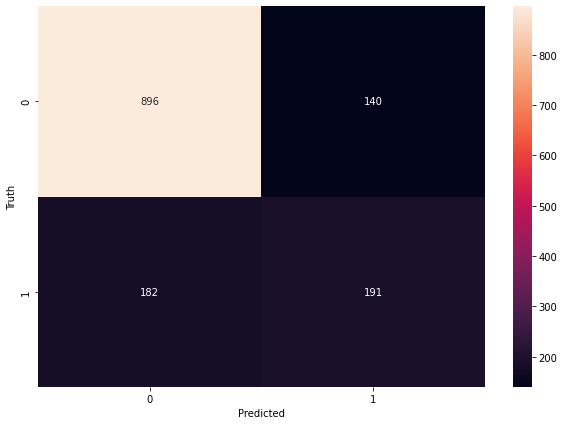

In [36]:
cm = tf.math. confusion_matrix(labels= y_test, predictions= y_pred)
plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot= True, fmt= 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Conclusion
---

### EDA Analysis

1. Most of the data contains class label 'No' means customer will remain with the company. If out of all the available data 73.46% customers are going to stay with the company, then for any given input we can say with 73% accuracy that the customer will stay with the company.


2. Customer gender doesn't seem to affecting churn count.


3. Senior citizens though being few in number have higher customer churn percentage.


4. Customers who are using DSL internet service tends to be more loyal as compare to fiber optic using customers. My suggestion to the company is to find the shortcoming in the DSL service and keep doing what they're doing with fiber optic service. Also note that if customers are not using nay internet service then churn count reduces even further. So over all the company should have a look at the internet service offerings and try to fix bring down the shortcomings.


5. Customers tend to stay with the company after the first 10 months of service. So the company can concentrate more on the new customer and their initial experience with the service to increase the customer retention.


6. Lowest monthly rates between 20 and 40, highest is the customer retention. But customer attrition increases for monthly charges between 70 and 100. So the company can reduce the monthly charges or add more value to the service for the same price to increase the customer retention.

### Model Analysis

1. Precision, Recall, and F1 score for 'class 0' is more than 80% and around 50% for 'class 1'


2. The accuracy of the model was about 79% which is better than the 73.46% that customer from given data do not churn.